In [4]:
from basicsr.trainer import Surgeon, SurgeonTrainer
from basicsr.data import restore_volume, semi_synthetic_creation, \
     generate_raw_data, generate_zs_dataset, adjust_contrast, denoised_semi_synthetic_creation
from basicsr.model_train import trainer_train,restore
from easydict import EasyDict
import os
import tifffile
from oct.utils import generate_dataset, stack
import cv2
from basicsr.utils.dataset import normalize, resize


SSAI_PATH = "C:/Users/rkulothu/Documents/Repos/SSAI-oct/SSAI-3D"

In [5]:
raw_tif_path = f"{SSAI_PATH}/raw_data/oct.tif"
project_depth = 7
data_save_path = "data"
results_save_path = "results"

In [6]:
generate_dataset.create_projected_data(raw_tif_path, data_save_path, project_depth)

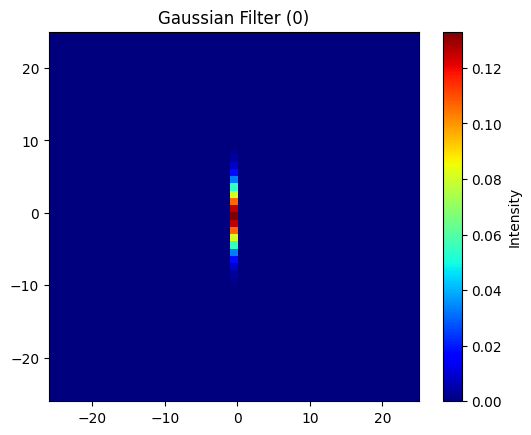

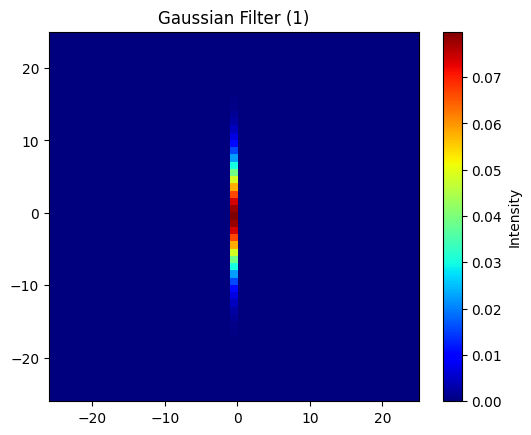

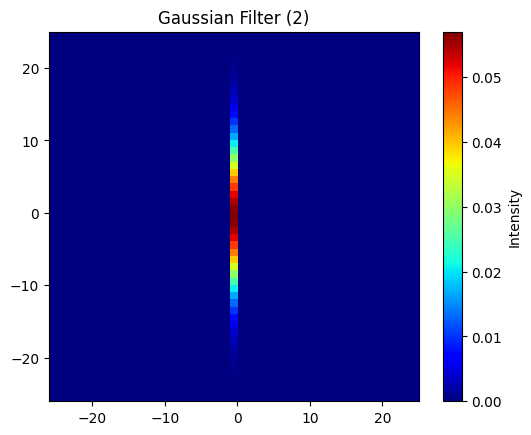

In [8]:
generate_dataset.create_synthetic_data_from_slices(f"{data_save_path}/{generate_dataset.projected_dir}", 
                                                   data_save_path, kernel_num=3, dr_h=2, dr_w=1, blur_height=True)

In [9]:
generate_dataset.create_zs_dataset(data_save_path)

In [10]:
configs = EasyDict({
    'model_path' : f'{SSAI_PATH}/pretrained_models/NAFNet-REDS-width64.pth',
    'lq_pth': os.path.join(data_save_path, 'zs_lq'),
    'gt_pth': os.path.join(data_save_path, 'zs_gt'),
    'lr': 1e-4
})
operation = Surgeon(configs)
operation.get_zeroshot_information()
surgeon_trainer = SurgeonTrainer()
elementwise_input = operation.input_dict.copy()
rank = surgeon_trainer.forward_all(elementwise_input)

Disable distributed.
none
rank: 0
ws: 1


2025-04-23 15:28:43,765 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of dict object at 0x000001CE14AA3D80>
.. cosineannealingLR
grad_norm
snip
grasp
fisher


c:\Users\rkulothu\Documents\Repos\SSAI-oct\SSAI-3D\.venv\lib\site-packages\torch\nn\modules\module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


plain
synflow
None weight loaded


In [11]:
trainer_train(rank, data_save_path)

Disable distributed.
none
Path already exists. Rename it to c:\users\rkulothu\documents\repos\ssai-oct\ssai-3d\experiments\demo_neurons_archived_20250423_153005
Path already exists. Rename it to tb_logger\demo_neurons_archived_20250423_153005


2025-04-23 15:30:05,648 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.2.0+3aa7045
	PyTorch: 1.11.0+cu113
	TorchVision: 0.12.0+cu113
2025-04-23 15:30:05,648 INFO: 
  name: demo_neurons
  model_type: ImageRestorationModel
  scale: 1
  num_gpu: 1
  manual_seed: 10
  datasets:[
    train:[
      name: reds-train
      type: PairedImageDataset
      dataroot_gt: data/gt
      dataroot_lq: data/lq
     

 load net keys <built-in method keys of dict object at 0x000001CDDD959B80>


2025-04-23 15:30:08,031 INFO: Model [ImageRestorationModel] is created.


.. cosineannealingLR


2025-04-23 15:30:08,465 INFO: Start training from epoch: 0, iter: 0
2025-04-23 15:33:40,514 INFO: [demo_..][epoch:  0, iter:     200, lr:(9.055e-05,)] [eta: 0:14:04, time (data): 1.003 (0.000)] l_pix: -3.0894e+01 


KeyboardInterrupt: 

In [ ]:
generate_dataset.generate_oct_raw_data(raw_pth = raw_tif_path, save_pth= data_save_path, dr = 2,xy_required=False, xz_required=True, yz_required=False)

uint16
(500, 900, 500)


In [ ]:
in_pth_xz = os.path.join(data_save_path, 'test_xz')

out_pth_xz = os.path.join(results_save_path, 'test_xz')

restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth =  'C:/Users/rkulothu/Documents/Repos/SSAI-oct/SSAI-3D/pretrained_models/NAFNet-REDS-width64.pth')


Disable distributed.
none


2025-04-13 17:18:14,110 INFO: Loading NAFNetLocal model from C:/Users/rkulothu/Documents/Repos/SSAI-3D/pretrained_models/NAFNet-REDS-width64.pth.


 load net keys <built-in method keys of dict object at 0x00000247113354C0>


2025-04-13 17:18:14,561 INFO: Model [ImageRestorationModel] is created.
100%|██████████| 500/500 [10:07<00:00,  1.21s/it]


In [ ]:
# in_pth_xy = os.path.join(data_save_path, 'test_xy')

# out_pth_xy = os.path.join(results_save_path, 'test_xy')

# restore(input_pth = in_pth_xy,\
#         output_pth = out_pth_xy,\
#         model_pth =  'C:/Users/rkulothu/Documents/Repos/SSAI-3D/pretrained_models/NAFNet-REDS-width64.pth')

Disable distributed.


none


2025-04-13 21:02:40,525 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of dict object at 0x000002817325A540>


100%|██████████| 500/500 [08:37<00:00,  1.04s/it]


In [ ]:
out_pth_xz = os.path.join(results_save_path, 'test_xz')
stack.create_3d_tiff(out_pth_xz, os.path.join(results_save_path ,"proj_7_rec_xz.tiff"))

100%|██████████| 500/500 [00:01<00:00, 275.43it/s]


(500, 2500, 900, 3)
(500, 2500, 900)


In [ ]:
# out_pth_xy = os.path.join(results_save_path, 'test_xy')
# stack.create_3d_tiff(out_pth_xy, os.path.join(results_save_path ,"proj_7_rec_xy.tiff"))

100%|██████████| 500/500 [00:06<00:00, 73.39it/s]


(500, 900, 2500, 3)
(500, 900, 2500)


In [ ]:
# in_pth_yz = os.path.join(data_save_path, 'test_yz')

# out_pth_yz = os.path.join(results_save_path, 'test_yz')

# restore(input_pth = in_pth_yz,\
#         output_pth = out_pth_yz,\
#         model_pth =  'C:/Users/rkulothu/Documents/Repos/SSAI-3D/pretrained_models/NAFNet-REDS-width64.pth')

Disable distributed.
none
 load net keys <built-in method keys of dict object at 0x000002D517459480>


2025-04-14 14:39:07,376 INFO: Model [ImageRestorationModel] is created.
100%|██████████| 900/900 [44:56<00:00,  3.00s/it]


In [ ]:

# stack.create_3d_tiff(out_pth_yz, os.path.join(results_save_path ,"proj_7_rec_yz.tiff"))

100%|██████████| 900/900 [00:15<00:00, 59.45it/s]


(900, 2500, 2500, 3)
(900, 2500, 2500)
